Linear Kernel Accuracy: 0.9
RBF Kernel Accuracy: 0.93
Poly Kernel Accuracy: 0.79


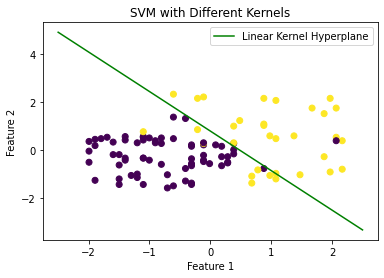

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, [2, 3]].values
Y = df.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Using linear kernel
from sklearn.svm import SVC
lin = SVC(kernel='linear', random_state=0)
lin.fit(X_train, Y_train)
pred_lin = lin.predict(X_test)

from sklearn.metrics import accuracy_score
print("Linear Kernel Accuracy:", accuracy_score(Y_test, pred_lin))

# Using rbf kernel
rbf = SVC(kernel='rbf', random_state=0)
rbf.fit(X_train, Y_train)
pred_rbf = rbf.predict(X_test)

print("RBF Kernel Accuracy:", accuracy_score(Y_test, pred_rbf))

# Using poly kernel
poly = SVC(kernel='poly', degree=4)
poly.fit(X_train, Y_train)
pred_poly = poly.predict(X_test)

print("Poly Kernel Accuracy:", accuracy_score(Y_test, pred_poly))

# Scatter plot of the test data points with true labels
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test)

# Create the hyperplane for the linear kernel
w = lin.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (lin.intercept_[0]) / w[1]

# Plot the hyperplane for the linear kernel
plt.plot(xx, yy, label='Linear Kernel Hyperplane', color='green')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Different Kernels')
plt.legend()
plt.show()